**`Generating Dataset using Scikit-Learn`**



In [0]:
from sklearn import linear_model, datasets
n_samples = 100
n_outliers = 50
x, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
n_informative=1, noise=10,
coef=True, random_state=0)

**Converting dataset into torch tensors and reshaping them**

In [0]:
import torch
X_Set = torch.tensor(x)
Y_Set = torch.tensor(y)
X_Set = X_Set.reshape(-1,)
Y_Set = Y_Set.reshape(-1,)

**Plotting Generated Dataset**

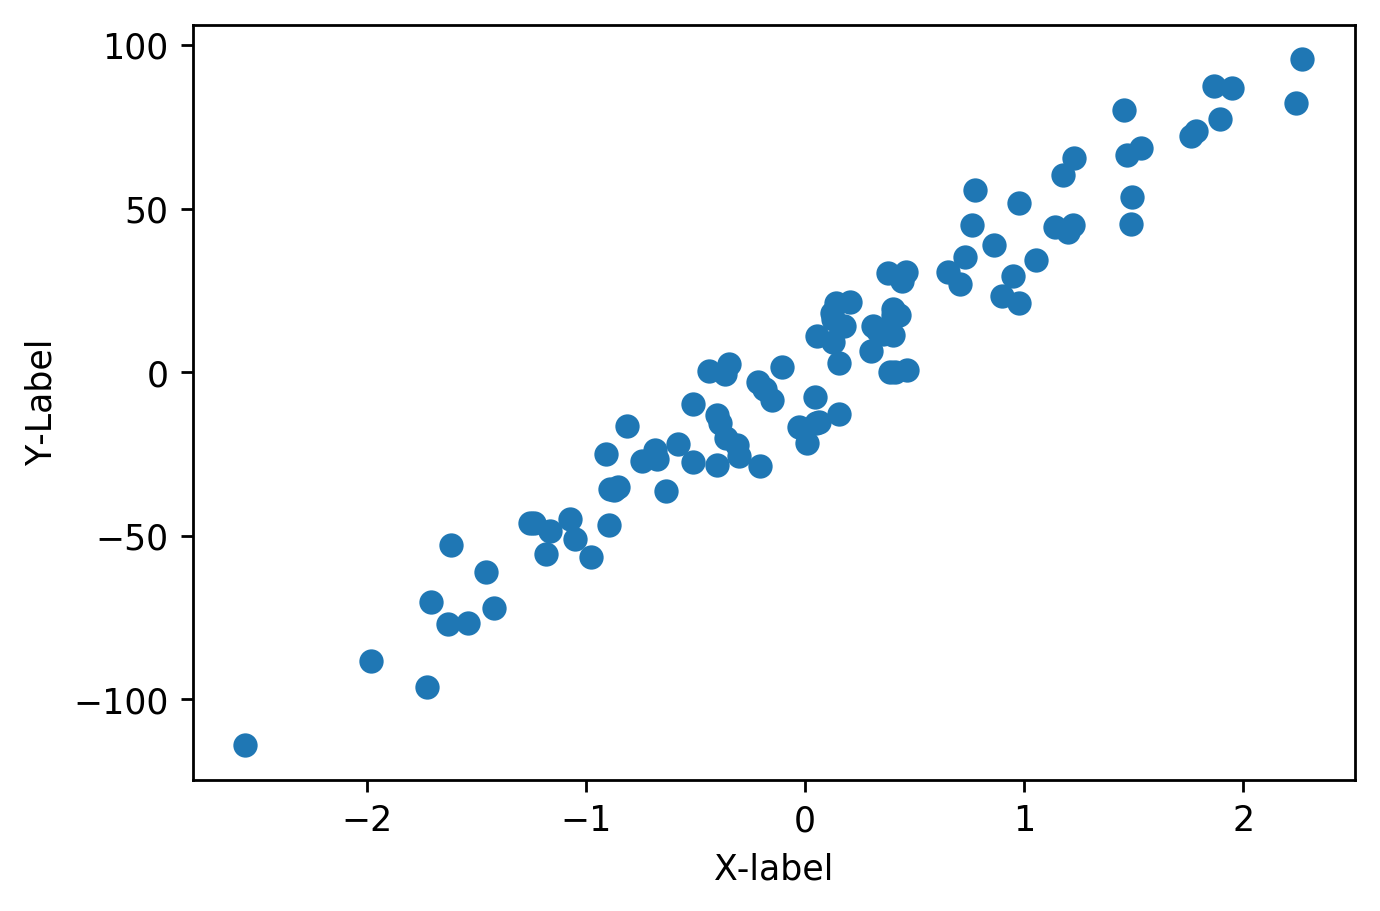

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=250)
plt.xlabel("X-label")
plt.ylabel("Y-Label")
plt.plot(X_Set.numpy(), Y_Set.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  

**Defining the Model, Loss Function, Gradient Update Function and Training Loop**

In [0]:
def model(X, w, b):
    return w * X + b

def loss_fn(P, Y):
    squared_diffs = (P - Y)**2
    return squared_diffs.mean()

def dloss_fn(P, Y):
    dsq_diffs = 2 * (P - Y) / P.size(0)  
    return dsq_diffs

def dmodel_dw(X, w, b):
    return X

def dmodel_db(X, w, b):
    return 1.0

def grad_fn(X, Y, P, w, b):
    dloss_dtp = dloss_fn(P, Y)
    dloss_dw = dloss_dtp * dmodel_dw(X, w, b)
    dloss_db = dloss_dtp * dmodel_db(X, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) 

def training_loop(n_epochs, learning_rate, params, X, Y, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        P = model(X, w, b)  
        loss = loss_fn(P, Y)
        grad = grad_fn(X, Y, P, w, b)  

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params



**Practising a Dry Run**


In [5]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    X = X_Set, 
    Y = Y_Set,
    print_params=False)

Epoch 1, Loss 1876.568573
Epoch 2, Loss 1805.356352
Epoch 3, Loss 1737.031179
...
Epoch 10, Loss 1330.308324
Epoch 11, Loss 1281.230988
...
Epoch 99, Loss 146.022597
Epoch 100, Loss 144.753785
...
Epoch 4000, Loss 114.171486
Epoch 5000, Loss 114.171486


tensor([42.6194, -0.8142], dtype=torch.float64)

**Training Linear Regression Model and Saving Parameters**

In [6]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    X = X_Set, 
    Y = Y_Set,
    print_params = False)

params

Epoch 1, Loss 1876.568573
Epoch 2, Loss 1805.356352
Epoch 3, Loss 1737.031179
...
Epoch 10, Loss 1330.308324
Epoch 11, Loss 1281.230988
...
Epoch 99, Loss 146.022597
Epoch 100, Loss 144.753785
...
Epoch 4000, Loss 114.171486
Epoch 5000, Loss 114.171486


tensor([42.6194, -0.8142], dtype=torch.float64)

**Printing Dataset Shape and Values**

In [7]:
print(X_Set.numpy().shape)
print(Y_Set.numpy().shape)
print(X_Set)
print(Y_Set)

(100,)
(100,)
tensor([-0.3596,  0.9766,  0.4023, -0.8131, -0.8878,  0.4439, -0.9773,  0.4283,
         0.2083, -0.3116, -0.5108,  0.1269, -1.5362, -0.4018,  0.6536,  1.1788,
        -0.1799,  1.7859,  1.4543, -0.6848,  0.9787,  1.8959, -0.4381,  0.3131,
         0.7610,  0.7775,  1.9508,  0.3337, -0.3479,  1.5328, -0.8955, -0.5788,
        -1.0486,  0.3782,  0.0105,  0.4628,  0.1440, -0.4032,  0.0519, -1.2528,
         1.0545,  0.4002, -1.7063,  2.2409,  0.1774, -0.2052,  1.2303, -0.8541,
         1.7641,  0.4106, -0.9073, -1.4200,  0.4657,  0.9008,  1.1394,  0.4020,
         0.3869, -1.7263,  1.4694, -0.1872, -0.8708,  0.3025,  1.2024, -1.9808,
        -2.5530, -1.4544, -0.0282,  0.1549,  1.2224,  1.8676,  2.2698, -0.7422,
         0.0665,  1.4941, -0.6725, -1.6302,  0.1290,  0.9501,  1.4883,  0.0562,
         0.8644,  0.7066, -0.1514, -1.0708, -0.1032, -0.3023, -0.3873,  0.7291,
         0.1217, -0.5097, -1.2348, -0.2127, -0.6343,  0.1563,  0.0458, -1.1651,
        -0.3627,  0.3564, 

**Plotting Dataset along with the Linear Regression Model Line**

From the plot we can see the model is fitting the dataset nicely but normailzation can be done to perform a perfect fit.

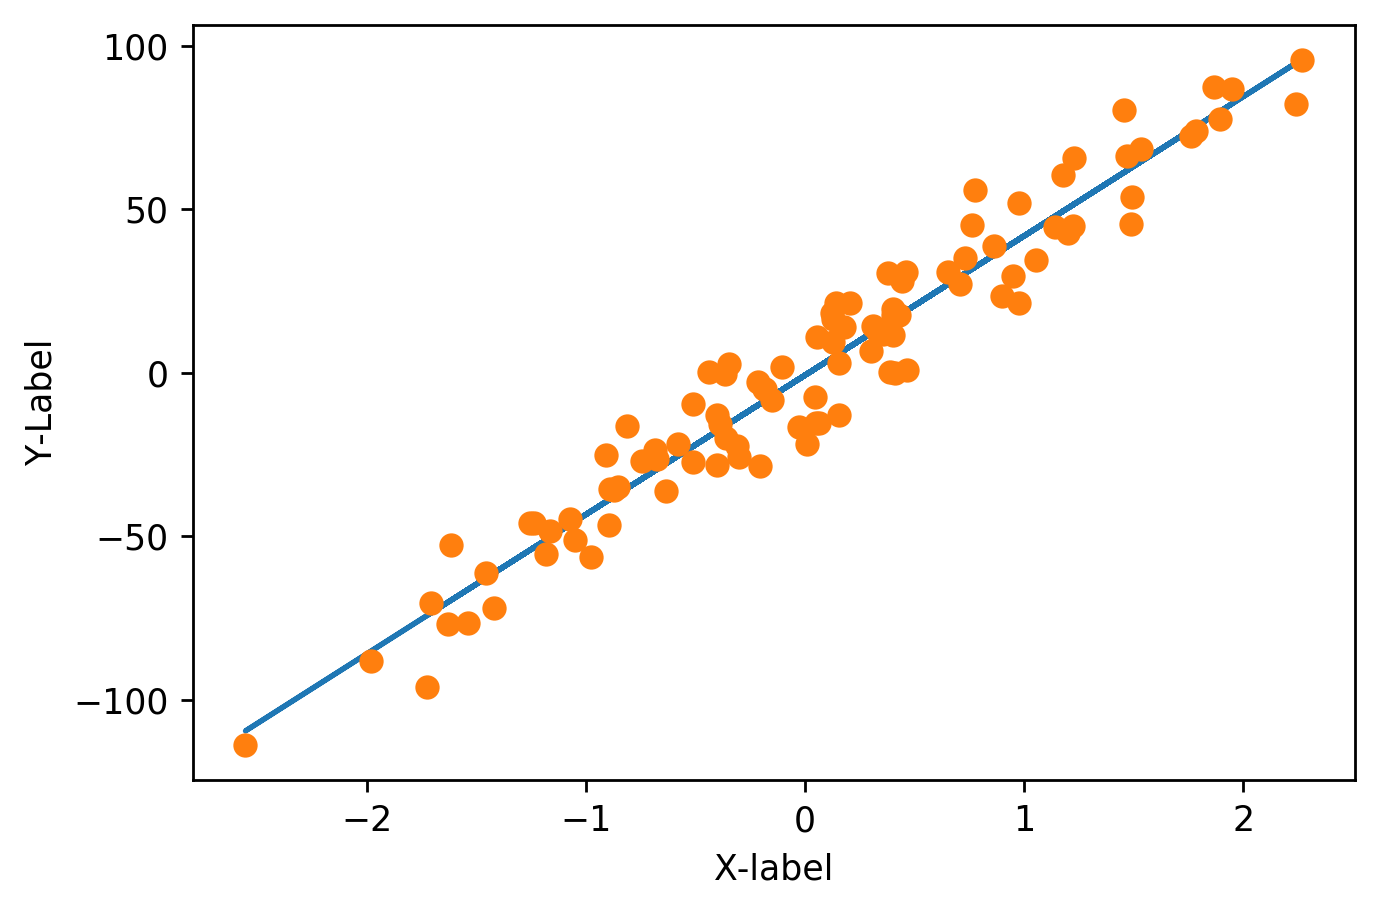

In [8]:

%matplotlib inline
from matplotlib import pyplot as plt

P = model(X_Set, *params)  

fig = plt.figure(dpi=250)
plt.xlabel("X-label")
plt.ylabel("Y-Label")
plt.plot(X_Set.numpy(), P.detach().numpy()) 
plt.plot(X_Set.numpy(), Y_Set.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  

